In [11]:
import pandas as p
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

['handicapped-infants' 'water-project-cost-sharing'
 'adoption-of-the-budget-resolution' 'physician-fee-freeze'
 'el-salvador-aid' 'religious-groups-in-schools' 'anti-satellite-test-ban'
 'aid-to-nicaraguan-contras' 'mx-missile' 'immigration'
 'synfuels-crporation-cutback' 'education-spending'
 'superfund-right-to-sue' 'crime' 'duty-free-exports'
 'export-administration-act-south-africa']
0.5622119815668203


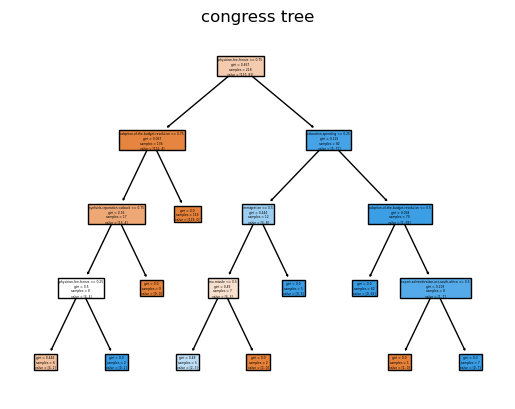

In [19]:
df = p.read_csv("CongressionalVotingID.shuf.lrn.csv")
df_result = p.read_csv("CongressionalVotingID.shuf.tes.csv")
expected = p.read_csv("CongressionalVotingID.shuf.sol.ex.csv")
#print(df)
df_result = df_result.drop(columns=["ID"])
df_result = df_result.fillna("unknown")
df_result = df_result.replace("unknown", "z")

df_result = df_result.replace("y", "1.0")
df_result = df_result.replace("z", "0.5")
df_result = df_result.replace("n", "0.0")

print(df_result.columns.values)
X = df.drop(columns=["class", "ID"])
y = df["class"]

X = X.fillna("unknown")
X = X.replace("unknown", "z")
X = X.replace("y", "1.0")
X = X.replace("z", "0.5")
X = X.replace("n", "0.0")
# iris = load_iris()
# X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X, y)

plt.figure()
tree.plot_tree(clf,feature_names=df_result.columns.values ,filled=True)
plt.title("congress tree")
plt.savefig('myfigure_200.png', dpi=400)

predicted = clf.predict(df_result)
# print(predicted)
acc = accuracy_score(predicted, expected["class"])
print(acc)